<a href="https://colab.research.google.com/github/rickylukman/Machine-Learning/blob/master/Machine_Learning_Clustering_Alvianda_Ricky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
df=pd.read_csv('gdrive/My Drive/used_cars_olah.csv')
df.shape

(20001, 12)

In [0]:
df.head()

,Unnamed: 0,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,0,0.000015,0.922330,0.974359,0.530292,0.0,0.5,0.0,0.5,0.0,0.000000,0.0
1,1,0.000000,0.961165,0.307692,0.425778,0.0,0.5,0.0,0.0,0.0,0.909091,0.0
2,2,0.000040,0.951456,0.333333,0.792904,0.0,0.5,0.0,0.0,0.0,0.909091,0.0
3,3,0.000000,0.961165,0.307692,0.425778,0.0,0.5,0.0,0.0,0.0,0.909091,0.0
4,4,0.000043,0.980583,0.307692,0.444847,0.0,0.0,0.0,0.0,0.0,0.909091,0.0


Ambil 2 kolom untuk clustering

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [4]:
#manufacturer ,paint color
print(df.iloc[:, [3, 10]])
cluster = df.iloc[:, [3, 10]].values

       manufacturer  paint_color
0          0.974359     0.000000
1          0.307692     0.909091
2          0.333333     0.909091
3          0.307692     0.909091
4          0.307692     0.909091
...             ...          ...
19996      0.820513     0.454545
19997      0.743590     0.909091
19998      0.487179     0.909091
19999      0.948718     0.909091
20000      0.948718     0.000000

[20001 rows x 2 columns]


Cari nilai K menggunakan elbow method

In [0]:
from matplotlib import pyplot as plt
import numpy as np

distortions = []
K = range(1,10)
for i in K:
  kmeanModel = KMeans(n_clusters=i).fit(cluster)
  kmeanModel.fit(cluster)
  distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /cluster.shape[0] ) 

<function matplotlib.pyplot.show>

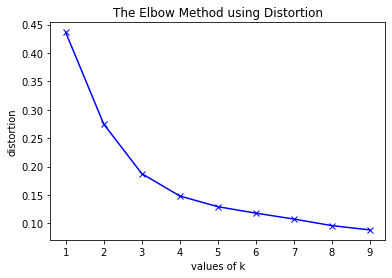

<Figure size 360x360 with 0 Axes>

In [7]:
#plot elbow method
plt.plot(K, distortions, 'bx-')
plt.xlabel('values of k')
plt.ylabel('distortion')
plt.title('The Elbow Method using Distortion')
fig = plt.figure(figsize=(5, 5))
plt.show


In [0]:
cluster.shape

(20001, 2)

In [0]:
# Inisiasi nilai K
K = 3

Plot sebaran data

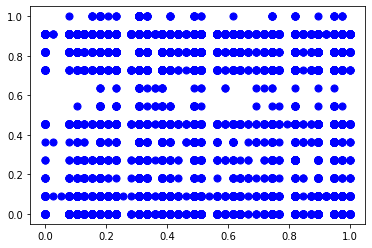

In [62]:
import matplotlib.pyplot as plt
plt.scatter(cluster[ : , 0], cluster[ :, 1], s = 50, c = 'b')
plt.show()

Buat centroid random

In [0]:
# Inisiasi kolom yang dipakai 
dx = cluster[ : , 0].tolist()
dy = cluster[ : , 1].tolist()

In [0]:
# Menggabungkan data kolom manufacture dan paint_color
titik = list(zip(dx, dy))

In [0]:
import random

In [0]:
def cekcentroid(centroid1,centroid2): 
  cobax = random.uniform(0,1)
  cobay = random.uniform(0,1)
  if (cobax!=centroid1[0]) and (cobay!=centroid1[1]) and (centroid2==0):
    centroid2 = [cobax,cobay]
    return centroid2
  elif(cobax!=centroid1[0]) and (cobay!=centroid1[1]) and (cobax!=centroid2[0]) and (cobay!=centroid2[1]):
    centroid3 = [cobax,cobay]
    return centroid3

In [76]:
cobax = random.uniform(0,1)
cobay = random.uniform(0,1)
centroid1 = [cobax,cobay]
centroid2 = cekcentroid(centroid1,0)
centroid3 = cekcentroid(centroid1,centroid2)
print(centroid1)
print(centroid2)
print(centroid3)

[0.5170352945784639, 0.06892538342783572]
[0.7816017386681748, 0.9711562659659394]
[0.24039125773989578, 0.12633636078335897]


Text(0, 0.5, 'paint_color')

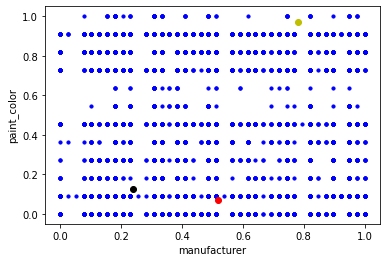

In [77]:
plt.scatter(dx, dy, s = 10, c = 'b')
plt.scatter(centroid1[0], centroid1[1], c='r')
plt.scatter(centroid2[0], centroid2[1], c='y')
plt.scatter(centroid3[0], centroid3[1], c='black')
plt.xlabel('manufacturer')
plt.ylabel('paint_color')

Perulangan untuk centroid dengan euclidian

In [0]:
import math

Text(0, 0.5, 'paint_color')

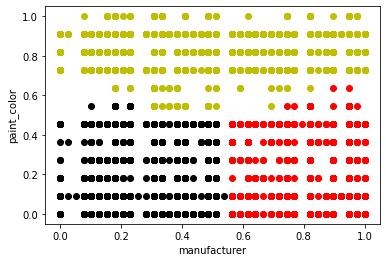

In [96]:
cek = False
clusterfix = []
while cek != True:
  # Proses menklusterkan
  #clusAr = kolomA RED, clusAy = kolomA YELLOW, clusAb = kolomA BLACK
  clusAr, clusAy, clusAb = [], [], []
  clusBr, clusBy, clusBb = [], [], []
  for i in titik:
    # Menghitung jarak 2 titik dengan Euclidian Distance
    #jarak antara titik i dengan centroid pertama (red))
    hitung1 = (i[0] - centroid1[0])**2 + (i[1] - centroid1[1])**2
    #jarak antara titik i dengan centroid kedua (yellow)
    hitung2 = (i[0] - centroid2[0])**2 + (i[1] - centroid2[1])**2
    #jarak antara titik i dengan centroid ketiga (black)
    hitung3 = (i[0] - centroid3[0])**2 + (i[1] - centroid3[1])**2

    if min(hitung1, hitung2, hitung3) == hitung1:
      # red
      clusAr.append(i[0])
      clusBr.append(i[1])
      clusterfix.append(1)
    elif min(hitung1, hitung2, hitung3) == hitung2:
      # yellow
      clusAy.append(i[0])
      clusBy.append(i[1])
      clusterfix.append(2)
    elif min(hitung1, hitung2, hitung3) == hitung3:
      # black
      clusAb.append(i[0])
      clusBb.append(i[1])
      clusterfix.append(3)
  #endfor

  # a,b,c untuk menyimpan centroid sebelumnya
  a = centroid1
  b = centroid2
  c = centroid3

  # Update centroid
  centroid1 = [sum(clusAr)/len(clusAr), sum(clusBr)/len(clusBr)]
  centroid2 = [sum(clusAy)/len(clusAy), sum(clusBy)/len(clusBy)]
  centroid3 = [sum(clusAb)/len(clusAb), sum(clusBb)/len(clusBb)]

  # Cek apakah centroid tetap atau berubah
  if (centroid1 == a) and (centroid2 == b) and (centroid3 == c):
      cek = True

#endwhile

# plt.scatter(dx, dy, s = 10, c = 'b')
plt.scatter(clusAr, clusBr, c='r')
plt.scatter(clusAy, clusBy, c='y')
plt.scatter(clusAb, clusBb, c='black')
plt.xlabel('manufacturer')
plt.ylabel('paint_color')

In [97]:
print(len(clusterfix))

20001
